<a href="https://colab.research.google.com/github/MarekSroka/SDA_projekty/blob/main/Acctivity%20type/Activity_type_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Packages import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, HalvingGridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import svm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

#Project description:


Based on smartphone data, we have 21 participants from whose phones the data was taken for the collection being processed. The dataset contains 6 type of activity (target data):

-Walking

-Walking Upstairs

-Walking Downstairs

-Sitting

-Standing

-Laying

For each record in the dataset it is provided:

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
- Triaxial Angular velocity from the gyroscope.
- A 561-feature vector with time and frequency domain variables.
- Its activity label.
- An identifier of the subject who carried out the experiment.

**The aim of the project is to build a model that predicts the activity being performed as accurately as possible.**

# Functions

In [ ]:
# printing results functions

def clasiffication_metrics_multiclass(true, prediction):
    print(f'Accuracy: {accuracy_score(true, prediction)}')
    print(f'Precision: {precision_score(true, prediction, average="weighted")}')
    print(f'Recall: {recall_score(true, prediction, average="weighted")}')
    print(f'F1 score: {f1_score(true, prediction, average="weighted")}')


# Data exploration

In [ ]:
df = pd.read_csv('drive/MyDrive/ML_uczenie_nadz_klasyfikacja/activity_type.csv')
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [ ]:
df.shape

(7352, 563)

**Correlation map of the whole dataset**

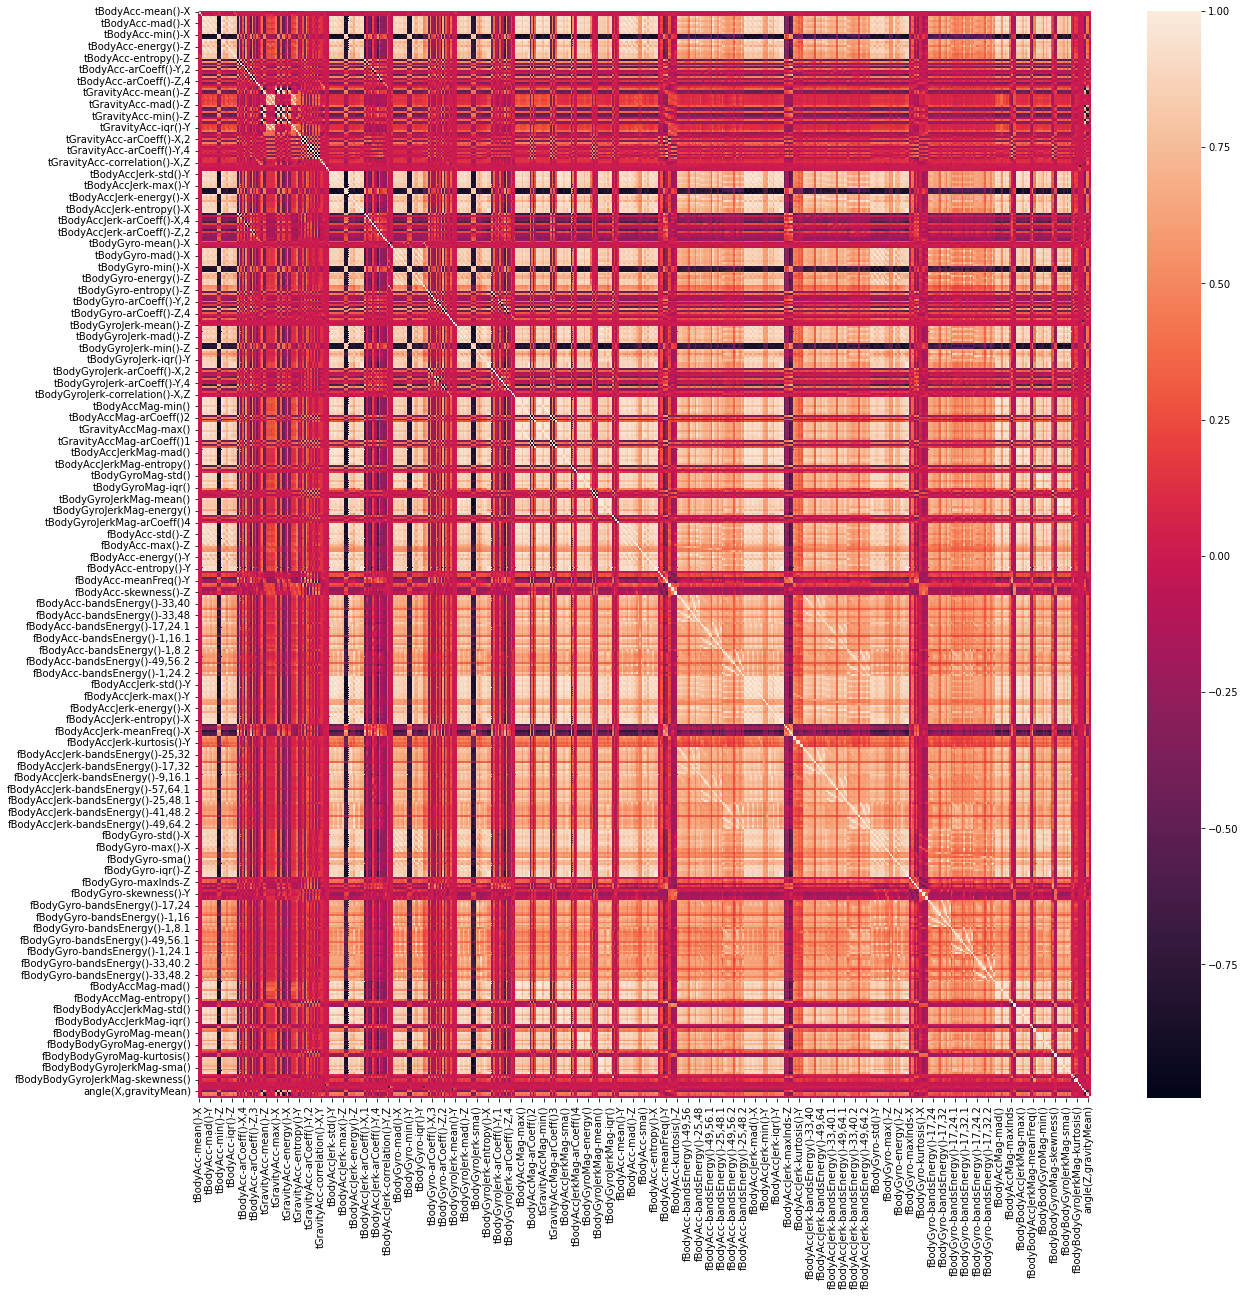

In [ ]:
corr = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [ ]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


<Figure size 1080x720 with 0 Axes>

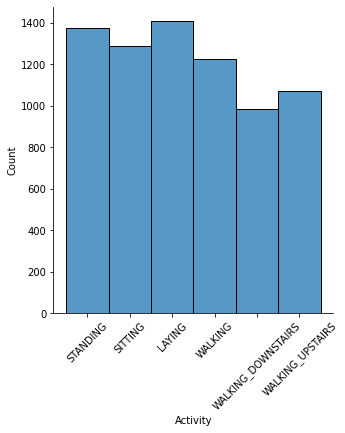

In [ ]:
target = df.iloc[:, -1]

plt.figure(figsize=(15, 10))

sns.displot(target)
plt.xticks(rotation=45)

plt.show()

As can be seen, the explained variable has balanced values

Below you can see the distribution of the different activities

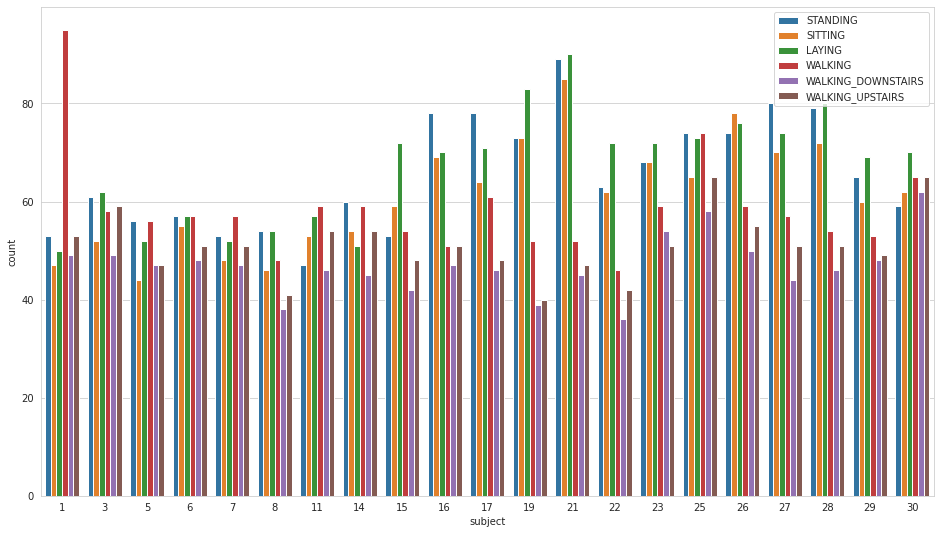

In [ ]:
plt.figure(figsize=(16, 9))

sns.set_style('whitegrid')
sns.countplot(x='subject',hue='Activity', data = df)
plt.legend(loc='upper right')
plt.show()

In [ ]:
df1 = df[df['Activity']=='STANDING']
df2 = df[df['Activity']=='SITTING']
df3 = df[df['Activity']=='LAYING']

df4 = df[df['Activity']=='WALKING']
df5 = df[df['Activity']=='WALKING_DOWNSTAIRS']
df6 = df[df['Activity']=='WALKING_UPSTAIRS']

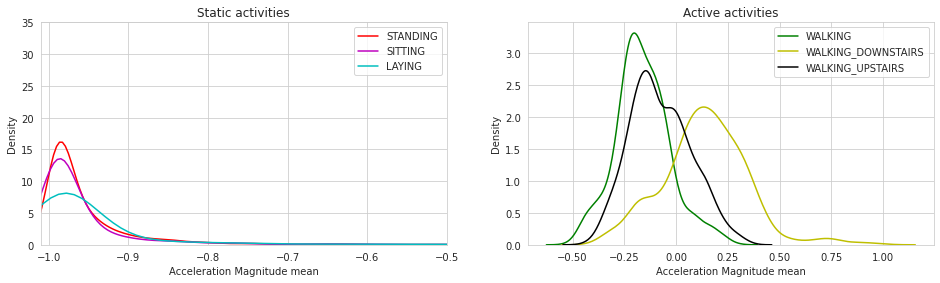

In [ ]:
plt.figure(figsize=(16,9))

plt.subplot(221)
plt.title('Static activities')
sns.distplot(df1['tBodyAccMag-mean()'],color = 'r',hist = False, label = 'STANDING')
sns.distplot(df2['tBodyAccMag-mean()'],color = 'm',hist = False, label = 'SITTING')
sns.distplot(df3['tBodyAccMag-mean()'],color = 'c',hist = False, label = 'LAYING')
plt.xlabel('Acceleration Magnitude mean')
plt.axis([-1.01, -0.5, 0, 35])

plt.legend()

plt.subplot(222)
plt.title('Active activities')
sns.distplot(df4['tBodyAccMag-mean()'],color = 'g',hist = False, label = 'WALKING')
sns.distplot(df5['tBodyAccMag-mean()'],color = 'y',hist = False, label = 'WALKING_DOWNSTAIRS')
sns.distplot(df6['tBodyAccMag-mean()'],color = 'k',hist = False, label = 'WALKING_UPSTAIRS')
plt.xlabel('Acceleration Magnitude mean')

plt.legend()

plt.show()

There are big differences between active and static activities for some features

In [ ]:
X = df.iloc[:, 0:-2]

In [ ]:
y = df['Activity']

## Feature selection
using logistic regression

In [ ]:
X_train_std, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2022)

In [ ]:
param = {'C': [10**-2,10**-1,10**0,10**1,10**2]}

lr_model = LogisticRegression(penalty='l1', solver='liblinear',n_jobs=-1,random_state=2022)
gs_model = GridSearchCV(estimator=lr_model, param_grid=param,n_jobs=-1)
gs_model.fit(X_train_std, y_train)

model = LogisticRegression(**gs_model.best_params_, penalty='l1', solver='liblinear', random_state=2022)
model.fit(X_train_std, y_train)

LogisticRegression(C=10, penalty='l1', random_state=2022, solver='liblinear')

In [ ]:
coef=model.coef_[0]
coef

array([-1.07036147e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.99285443e-02,  0.00000000e+00,  0.00000000e+00,
        9.71718246e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.67231756e-01,  1.10982206e+00,  2.89789039e-01, -6.98939682e-01,
       -2.57003465e+00,  0.00000000e+00,  0.00000000e+00,  1.64500773e-02,
        0.00000000e+00,  6.55716198e-02,  3.90981989e-01,  0.00000000e+00,
        2.95124073e-02, -1.92607349e+00,  0.00000000e+00,  0.00000000e+00,
       -3.77945006e+00,  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2022)

In [ ]:
imp_features = pd.Series(X.columns)[list(coef!=0)]
X_train = X_train[imp_features]
X_test = X_test[imp_features]
imp = list(imp_features)
print(f'Selected features: {imp}')
print(f'Selected features no: {len(imp)}')

Selected features: ['tBodyAcc-mean()-X', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-std()-X', 'tGravityAcc-std()-Z', 'tGravityAcc-mad()-X', 'tGravityAcc-mad()-Z', 'tGravityAcc-max()-X', 'tGravityAcc-min()-X', 'tGravityAcc-min()-Y', 'tGravityAcc-sma()', 'tGravityAcc-energy()-X', 'tGravityAcc-energy()-Y', 'tGravityAcc-iqr()-X', 'tGravityAcc-entropy()-X', 'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-mad()-X', 'tBodyAccJerk-sma()', 'tBodyAccJerk-energy()-X', 'tBodyAccJerk-energy()-Y', 'tBodyAccJerk-energy()-Z', 'tBodyGyro-std()-X', 'tBodyGyro-mad()-Z', 'tBodyGyro-iqr()-Z', 'tBodyGyro-entropy()-X', 'tBodyGyro-arCoeff()-Y,4', 'tBodyGyro-correlation()-X,Y', 'tBodyGyro-correlation()-Y,Z', 'tBodyGyroJerk-energy()-X', 'tBodyGyroJerk-energy()-Y', 'tBodyGyroJerk-energy()-Z', 'tBodyGyroJerk-iqr()-Y', 'tBodyGyroJerk-entropy()-X', 'tBodyAccMag-std

## Division of data into restricted and unrestricted (feature selection and non-selection)

In [ ]:
X1 = X # all features
X2 = X.loc[:,imp] # limited by logistic regression

# Models

In [ ]:
# Split 1 - all features

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.33, random_state=2022)

# Split 2 - limited by logistic regression

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.33, random_state=2022)

## K - Nearest Neighbors

In [ ]:
# pipeline 1

numeric_transformer = Pipeline(steps=[
    ('standardscaler', StandardScaler()),
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X1.columns)
    ])

pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor),                      
    ('knn',KNeighborsClassifier())
    
])

print(pipeline1.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'knn', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__standardscaler', 'preprocessor__num__standardscaler__copy', 'preprocessor__num__standardscaler__with_mean', 'preprocessor__num__standardscaler__with_std', 'knn__algorithm', 'knn__leaf_size', 'knn__metric', 'knn__metric_params', 'knn__n_jobs', 'knn__n_neighbors', 'knn__p', 'knn__weights'])


In [ ]:
params1 = {
    'verbose':[True],
    'knn__algorithm':['ball_tree', 'kd_tree', 'brute'],
    'knn__leaf_size':[45, 55, 65, 75],
    'knn__metric':['manhattan', 'minkowski', 'euclidean'],
    'knn__n_neighbors':[2,5,10],
    'knn__weights':['distance', 'uniform']
}

grid_search1 = HalvingGridSearchCV(
    pipeline1,
    params1,
    n_jobs=-1,
    cv=5,
    verbose=1,
    scoring='f1_weighted'
)

In [ ]:
# pipeline 2

numeric_transformer = Pipeline(steps=[
    ('standardscaler', StandardScaler()),
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X2.columns)
    ])

pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor),                      
    ('knn',KNeighborsClassifier())
    
])

print(pipeline2.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'knn', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__standardscaler', 'preprocessor__num__standardscaler__copy', 'preprocessor__num__standardscaler__with_mean', 'preprocessor__num__standardscaler__with_std', 'knn__algorithm', 'knn__leaf_size', 'knn__metric', 'knn__metric_params', 'knn__n_jobs', 'knn__n_neighbors', 'knn__p', 'knn__weights'])


In [ ]:
# Split 1
grid_search1.fit(X1_train,y1_train)
knn_model_split1 = grid_search1.best_estimator_

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 60
max_resources_: 4925
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 216
n_resources: 60
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
----------
iter: 1
n_candidates: 72
n_resources: 180
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 2
n_candidates: 24
n_resources: 540
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 3
n_candidates: 8
n_resources: 1620
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 4
n_candidates: 3
n_resources: 4860
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.4s


In [ ]:
print('Best hyperparameter gridsearch1:', grid_search1.best_params_ )

Best hyperparameter gridsearch1: {'knn__algorithm': 'kd_tree', 'knn__leaf_size': 65, 'knn__metric': 'manhattan', 'knn__n_neighbors': 2, 'knn__weights': 'distance', 'verbose': True}


In [ ]:
params2 = {
    'verbose':[True],
    'knn__algorithm':['ball_tree', 'kd_tree', 'brute'],
    'knn__leaf_size':[2, 5, 8],
    'knn__metric':['manhattan', 'minkowski', 'euclidean'],
    'knn__n_neighbors':[2, 5, 10],
    'knn__weights':['distance', 'uniform']
}

grid_search2 = HalvingGridSearchCV(
    pipeline2,
    params2,
    n_jobs=-1,
    verbose=1,
    scoring='f1_weighted'
)

In [ ]:
# Split 2
grid_search2.fit(X2_train,y2_train)
knn_model_split2 = grid_search2.best_estimator_

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 60
max_resources_: 4925
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 162
n_resources: 60
Fitting 5 folds for each of 162 candidates, totalling 810 fits
----------
iter: 1
n_candidates: 54
n_resources: 180
Fitting 5 folds for each of 54 candidates, totalling 270 fits
----------
iter: 2
n_candidates: 18
n_resources: 540
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 3
n_candidates: 6
n_resources: 1620
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 4
n_candidates: 2
n_resources: 4860
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.1s


In [ ]:
print('Best hyperparameter gridsearch2:', grid_search2.best_params_ )

Best hyperparameter gridsearch2: {'knn__algorithm': 'kd_tree', 'knn__leaf_size': 2, 'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'uniform', 'verbose': True}


In [ ]:
y_pred_split1 = knn_model_split1.predict(X1_test)

y_pred_split2 = knn_model_split2.predict(X2_test)

In [ ]:
# Results
print('------KNN--------')
print('Results with all features')
clasiffication_metrics_multiclass(y1_test,y_pred_split1)
print('\nResults after feature selection')
clasiffication_metrics_multiclass(y2_test,y_pred_split2)


------KNN--------
Results with all features
Accuracy: 0.9777503090234858
Precision: 0.9778620018447685
Recall: 0.9777503090234858
F1 score: 0.9777403605169127

Results after feature selection
Accuracy: 0.9641532756489494
Precision: 0.9659860754982582
Recall: 0.9641532756489494
F1 score: 0.9639600150552219


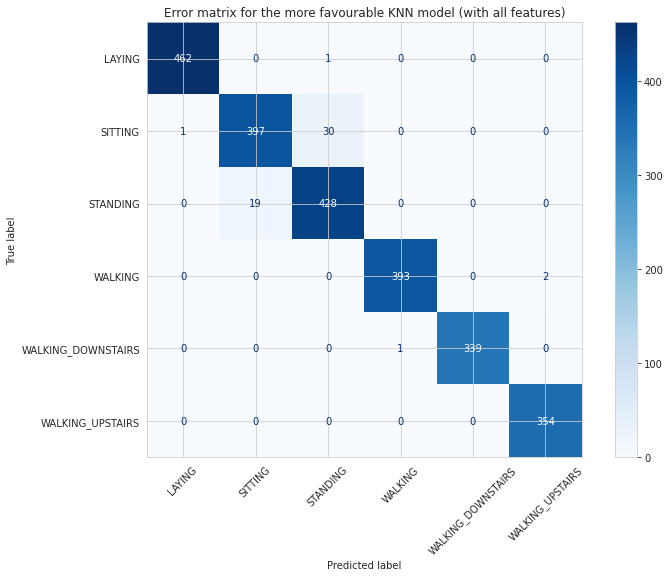

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
metrics.plot_confusion_matrix(knn_model_split1, X1_test, y1_test,
                              cmap=plt.cm.Blues, normalize=None, ax=ax)
ax.tick_params(axis='x', rotation=45)
plt.title('Error matrix for the more favourable KNN model (with all features)')
plt.show()

## Support Vector Classification

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('standardscaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X1.columns),
    ])

final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('SVM', svm.SVC())])

In [ ]:
param_grid = {'SVM__C': [170, 180, 200],
              'SVM__gamma': [ 0.01, 0.001, 0.0001],
              'SVM__kernel': ['rbf']}
SVM_gridsearch = HalvingGridSearchCV(final_pipeline,
                                     param_grid,
                                     scoring='f1_macro',
                                     cv=5,
                                     verbose=2,
                                     n_jobs=-1,
                                     random_state=2022)

SVM_model_split1 = SVM_gridsearch.fit(X1_train, y1_train)
print('\nBest hyperparameter:', SVM_gridsearch.best_params_)

SVM_model_split1 = SVM_gridsearch.best_estimator_

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 547
max_resources_: 4925
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 9
n_resources: 547
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 1
n_candidates: 3
n_resources: 1641
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 2
n_candidates: 1
n_resources: 4923
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best hyperparameter: {'SVM__C': 180, 'SVM__gamma': 0.001, 'SVM__kernel': 'rbf'}


In [ ]:
y_pred_svm_split1 = SVM_model_split1.predict(X1_test)

print('Results with all features')
clasiffication_metrics_multiclass(y1_test, y_pred_svm_split1)

Results with all features
Accuracy: 0.9872270292542233
Precision: 0.9872595055624596
Recall: 0.9872270292542233
F1 score: 0.9872231514490675


In [ ]:
numeric_transformer = Pipeline(steps=[
    ('standardscaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X2.columns),
    ])

final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('SVM', svm.SVC())])

In [ ]:
param_grid = {'SVM__C': [700, 800, 900],
              'SVM__gamma': [ 0.01, 0.001, 0.0001],
              'SVM__kernel': ['rbf', 'poly']}
SVM_gridsearch = HalvingGridSearchCV(final_pipeline,
                                     param_grid,
                                     scoring='f1_macro',
                                     cv=5,
                                     verbose=2,
                                     n_jobs=-1,
                                     random_state=2022)

SVM_model_split2 = SVM_gridsearch.fit(X2_train, y2_train)
print('\nBest hyperparameter:', SVM_gridsearch.best_params_)

SVM_model_split2 = SVM_gridsearch.best_estimator_

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 547
max_resources_: 4925
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 18
n_resources: 547
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 1
n_candidates: 6
n_resources: 1641
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 2
n_candidates: 2
n_resources: 4923
Fitting 5 folds for each of 2 candidates, totalling 10 fits

Best hyperparameter: {'SVM__C': 800, 'SVM__gamma': 0.001, 'SVM__kernel': 'rbf'}


In [ ]:
print('Support Vector Machine\n')

print('Results with all features')
y_pred_svm_split1 = SVM_model_split1.predict(X1_test)
clasiffication_metrics_multiclass(y1_test, y_pred_svm_split1)

print('\nResults after feature selection\n')
y_pred_svm_split2 = SVM_model_split2.predict(X2_test)

clasiffication_metrics_multiclass(y2_test, y_pred_svm_split2)

Support Vector Machine

Results with all features
Accuracy: 0.9872270292542233
Precision: 0.9872595055624596
Recall: 0.9872270292542233
F1 score: 0.9872231514490675

Results after feature selection

Accuracy: 0.980634528224145
Precision: 0.9806344528378536
Recall: 0.980634528224145
F1 score: 0.9806340436239517


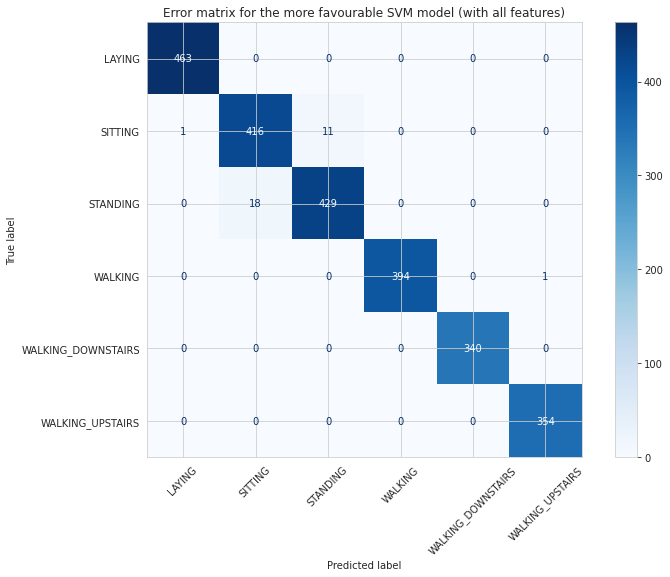

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
metrics.plot_confusion_matrix(SVM_model_split1, X1_test, y1_test,
                              cmap=plt.cm.Blues, normalize=None, ax=ax)
ax.tick_params(axis='x', rotation=45)
plt.title('Error matrix for the more favourable SVM model (with all features)')
plt.show()

## Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
print(rf_model.get_params().keys())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


In [ ]:
# 1. Parameter tuning for all features

param = {
    'bootstrap': [True],
    'max_depth': [150, 160, 170, 180],
    'min_samples_leaf': [1, 3, 6],
    'min_samples_split': [2, 6, 8, 12],
    'n_estimators': [150, 200, 250],
    'criterion' :['gini', 'entropy']
}

RFC_gridsearch = HalvingGridSearchCV(  estimator = rf_model,
                                       param_grid = param,
                                       scoring='f1_macro',
                                       cv=5,
                                       verbose=2,
                                       n_jobs=-1,
                                       random_state=2022)

RFC_gridsearch.fit(X1_train, y1_train)
print('\nBest hyperparameter:', RFC_gridsearch.best_params_)

rf_model_split1 = RFC_gridsearch.best_estimator_

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 60
max_resources_: 4925
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 216
n_resources: 60
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
----------
iter: 1
n_candidates: 72
n_resources: 180
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 2
n_candidates: 24
n_resources: 540
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 3
n_candidates: 8
n_resources: 1620
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 4
n_candidates: 3
n_resources: 4860
Fitting 5 folds for each of 3 candidates, totalling 15 fits

Best hyperparameter: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 160, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 200}


In [ ]:
y_pred_rf_split1=rf_model_split1.predict(X1_test)

In [ ]:
# 2 Parameter tuning after features selection

param = {
    'bootstrap': [True],
    'max_depth': [50, 60, 70],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 3, 5],
    'n_estimators': [300, 350, 400],
    'criterion' :['entropy']
}

RFC_gridsearch2 = HalvingGridSearchCV( estimator = rf_model,
                                       param_grid = param,
                                       scoring='f1_macro',
                                       cv=5,
                                       verbose=2,
                                       n_jobs=-1,
                                       random_state=2022)

RFC_gridsearch2.fit(X2_train, y2_train)
print('\nBest hyperparameter:', RFC_gridsearch2.best_params_)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 60
max_resources_: 4925
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 108
n_resources: 60
Fitting 5 folds for each of 108 candidates, totalling 540 fits
----------
iter: 1
n_candidates: 36
n_resources: 180
Fitting 5 folds for each of 36 candidates, totalling 180 fits
----------
iter: 2
n_candidates: 12
n_resources: 540
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 3
n_candidates: 4
n_resources: 1620
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 4
n_candidates: 2
n_resources: 4860
Fitting 5 folds for each of 2 candidates, totalling 10 fits

Best hyperparameter: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 60, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 350}


In [ ]:
rf_model_split2 = RFC_gridsearch2.best_estimator_
y_pred_rf_split2=rf_model_split2.predict(X2_test)

In [ ]:
print('------RANDOM FOREST-------------------\n')
print('Results with all features')
clasiffication_metrics_multiclass(y1_test, y_pred_rf_split1)
print('\nResults after feature selection')
clasiffication_metrics_multiclass(y2_test, y_pred_rf_split2)

------RANDOM FOREST-------------------

Results with all features
Accuracy: 0.9822826534816647
Precision: 0.9823176124778663
Recall: 0.9822826534816647
F1 score: 0.9822878726337411

Results after feature selection
Accuracy: 0.9822826534816647
Precision: 0.9823495294401136
Recall: 0.9822826534816647
F1 score: 0.9822824108738724


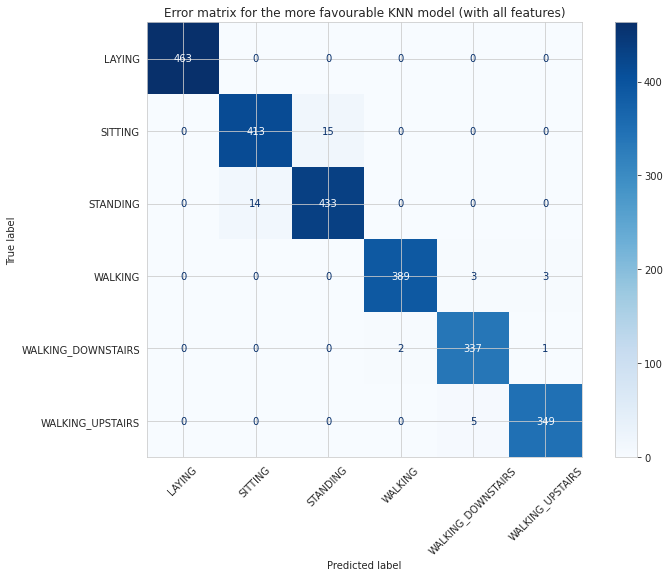

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
metrics.plot_confusion_matrix(rf_model_split1, X1_test, y1_test,
                              cmap=plt.cm.Blues, normalize=None, ax=ax)
ax.tick_params(axis='x', rotation=45)
plt.title(f'Error matrix for the more favourable KNN model (with all features)')
plt.show()

# Summary

In [ ]:
print('-------KNN-----------------------------\n')
print('Results for a dataset with all features')
clasiffication_metrics_multiclass(y1_test,y_pred_split1)
print('\nResults after feature selection ')
clasiffication_metrics_multiclass(y2_test,y_pred_split2)
print()

print('-------SVM-----------------------------\n')
print('Results for a dataset with all features')
clasiffication_metrics_multiclass(y1_test, y_pred_svm_split1)
print('\nResults after feature selection ')
clasiffication_metrics_multiclass(y2_test, y_pred_svm_split2)

print()
print('------RANDOM FOREST-------------------\n')
print('Results for a dataset with all features')
clasiffication_metrics_multiclass(y1_test, y_pred_rf_split1)
print('\nResults after feature selection ')
clasiffication_metrics_multiclass(y2_test, y_pred_rf_split2)

-------KNN-----------------------------

Results for a dataset with all features
Accuracy: 0.9777503090234858
Precision: 0.9778620018447685
Recall: 0.9777503090234858
F1 score: 0.9777403605169127

Results after feature selection 
Accuracy: 0.9641532756489494
Precision: 0.9659860754982582
Recall: 0.9641532756489494
F1 score: 0.9639600150552219

-------SVM-----------------------------

Results for a dataset with all features
Accuracy: 0.9872270292542233
Precision: 0.9872595055624596
Recall: 0.9872270292542233
F1 score: 0.9872231514490675

Results after feature selection 
Accuracy: 0.980634528224145
Precision: 0.9806344528378536
Recall: 0.980634528224145
F1 score: 0.9806340436239517

------RANDOM FOREST-------------------

Results for a dataset with all features
Accuracy: 0.9822826534816647
Precision: 0.9823176124778663
Recall: 0.9822826534816647
F1 score: 0.9822878726337411

Results after feature selection 
Accuracy: 0.9822826534816647
Precision: 0.9823495294401136
Recall: 0.982282653481

The models score relatively high and close, according to the above indications the best model would be an SVM trained on the full feature set. The model is currently only wrong on 2 static activities - sitting and standing

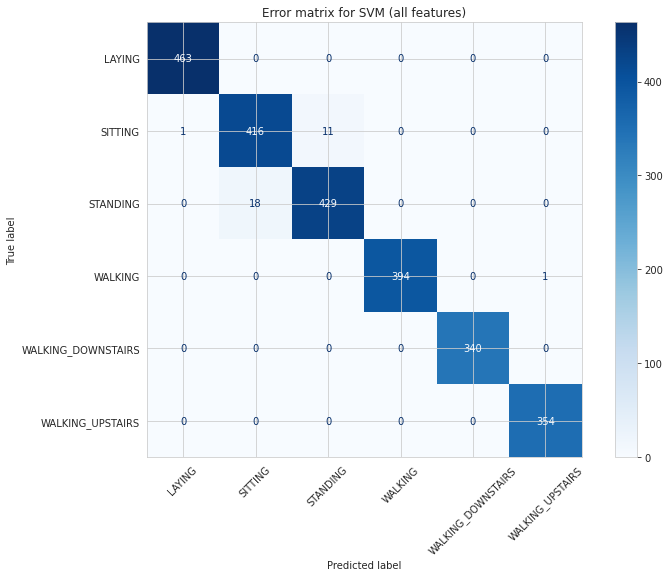

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
metrics.plot_confusion_matrix(SVM_model_split1, X1_test, y1_test,
                              cmap=plt.cm.Blues, normalize=None, ax=ax)
ax.tick_params(axis='x', rotation=45)
plt.title('Error matrix for SVM (all features)')
plt.show()